In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree  import DecisionTreeClassifier

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [23]:
#loading dataset
data=pd.read_csv(r'C:\Users\sharm\OneDrive\Documents\datasets\heart_failure_clinical_records_dataset.csv')

In [24]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [26]:
data.describe().T.sort_values(ascending=0,by="mean")

,count,mean,std,min,25%,50%,75%,max
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
time,299.0,130.260870,77.614208,4.0,73.0,115.0,203.0,285.0
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0


In [27]:
data.shape

(299, 13)

In [28]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [29]:
#ANALYSING DATA
#finding number of unique values in each column and the count of each value present in each column
column=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT']
for i in column:
    print(i.capitalize()) #to capitalize each column name and print it
    print("Number of unique values = ",data[i].nunique())
    print("Value Count")
    print(data[i].value_counts())
    print(" ")
    print("-------------------------------------------")
    print("")

Age
Number of unique values =  47
Value Count
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: age, dtype: int64
 
-------------------------------------------

Anaemia
Number of unique values =  2
Value Count
0    170
1    129
Name: anaemia, dtype: int64
 
-------------------------------------------

Creatinine_phosphokinase
Number of unique values =  208
Value Count
582     47
66       4
129      4
231      3
69       3
       

In [30]:
#Finding correlation between columns
co=data.corr()
co

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<AxesSubplot:>

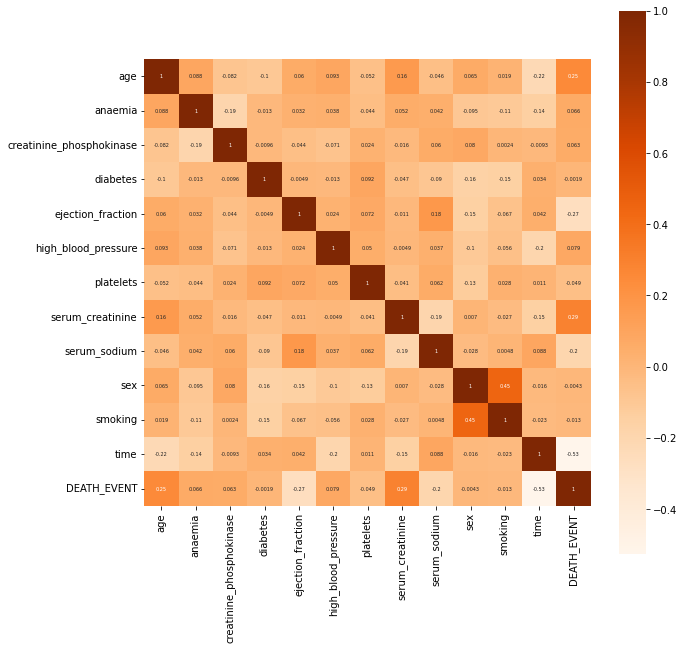

In [31]:
# plotting heatmap for correlation
plt.figure(figsize=(10,10))
sns.heatmap(co,annot=True,annot_kws={'size':5},square=True,cmap='Oranges')

In [32]:
co['DEATH_EVENT'].sort_values()

time                       -0.526964
ejection_fraction          -0.268603
serum_sodium               -0.195204
platelets                  -0.049139
smoking                    -0.012623
sex                        -0.004316
diabetes                   -0.001943
creatinine_phosphokinase    0.062728
anaemia                     0.066270
high_blood_pressure         0.079351
age                         0.253729
serum_creatinine            0.294278
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

In [33]:
#DATA VISUALIZATION

#Preparing subplot area with 5 rows and 3 columns
fig=make_subplots(
rows=5, cols=3,
    column_widths=[1,1,1],
    row_heights=[6,5,5,8,4],
    specs=[
        [{'type':'histogram'},{'type':'bar'},{'type':'histogram'}],
         [{'type':'pie'},{'type':'histogram'},{'type':'histogram'}],
         [{'type':'bar'},None,{'type':'pie'}],
        [{'type':'histogram'},{'type':'histogram'},{'type':'bar'}],
        [{'type':'bar'},{'type':'bar'},None]
    ]
)
fig.add_trace(go.Histogram(x=data['age'],name='Age'),row=1,col=1)

fig.add_trace(go.Bar(x=['0','1'],y=data['anaemia'].value_counts(),name='Anaemia',marker=dict(color="crimson")),row=1,col=2)

fig.add_trace(go.Histogram(x=data['ejection_fraction'],name='Ejection_fraction'),row=1,col=3)

fig.add_trace(go.Pie(
     labels=data['high_blood_pressure'].value_counts().index,values=data['high_blood_pressure'].value_counts().values,
     
     name="High_blood_pressure",hoverinfo="label+percent+name"),row=2, col=1)

fig.add_trace(go.Histogram(x=data['platelets'],name='Platelets'),row=2,col=2)


fig.add_trace(go.Histogram(x=data['serum_creatinine'],name='Serum_Creatinine'),row=2,col=3)

fig.add_trace(go.Bar(y=data['serum_sodium'].value_counts().values,x=data['serum_sodium'].value_counts().index,name="Serum_Sodium"),row=3,col=1)

fig.add_trace(go.Pie(
     labels=data['smoking'].value_counts().index,values=data['smoking'].value_counts().values,
     
     name="Smoking",hoverinfo="label+percent+name"),row=3, col=3)

fig.add_trace(go.Histogram(x=data['time'],name='Time'),row=4,col=1)

fig.add_trace(go.Histogram(x=data['creatinine_phosphokinase'],name='Creatinine_Phosphokinase'),row=4,col=2)

fig.add_trace(go.Bar(y=data['diabetes'].value_counts().values,x=['0','1'],name="Diabetes",marker=dict(color="orange")),row=4,col=3)

fig.add_trace(go.Bar(y=data['DEATH_EVENT'].value_counts().values,x=['0','1'],name="Death",marker=dict(color="brown")),row=5,col=1)

fig.add_trace(go.Bar(y=data['sex'].value_counts().values,x=['0','1'],name="Sex",marker=dict(color="pink")),row=5,col=2)

fig.update_xaxes(tickangle=45)

fig.update_layout(
    template="plotly_dark",
    margin=dict(r=50, t=30, b=50, l=50),
    
)


In [34]:
#splitting data into training and testing
x=data.drop(['DEATH_EVENT'],axis=1)
y=data['DEATH_EVENT']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [35]:
#APPLYING DIFFERENT MODELS
#LINEAR REGRESSION
ln=LinearRegression() #creating linear regressor
ln.fit(x_train,y_train)#training model 

#finding train score and test score
ln_train_score=round(ln.score(x_train,y_train),2)
ln_test_score=round(ln.score(x_test,y_test),2)

#model prediction on test data
y_pred_ln=ln.predict(x_test)

#accuracy score
y_pred_ln.flatten()
y_pred_ln = np.where(y_pred_ln > 0.5, 1, 0)
ln_acc = round(accuracy_score(y_pred_ln,y_test),2)

#to print train score, test score, accuracy score
print("LinearRegressionModel Train Score:",ln_train_score)
print("----------------------")
print("LinearRegressionModel Test Score:",ln_test_score)
print("----------------------")
print("LinearRegressionModel Accuracy Score:",ln_acc)
print("----------------------")

#getting testing accuracy,classification report s confusion matrix can't be plotted for it

ts_acc_ln = round(accuracy_score(y_test,y_pred_ln),4)
print("Testing Accuracy:",round(ts_acc_ln*100,2),"%")
print("----------------------")
print("Classification report for xtest data:-\n\n",classification_report(y_test,y_pred_ln),"\n")



LinearRegressionModel Train Score: 0.45
----------------------
LinearRegressionModel Test Score: 0.23
----------------------
LinearRegressionModel Accuracy Score: 0.77
----------------------
Testing Accuracy: 76.67 %
----------------------
Classification report for xtest data:-

               precision    recall  f1-score   support

           0       0.83      0.83      0.83        42
           1       0.61      0.61      0.61        18

    accuracy                           0.77        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.77      0.77      0.77        60
 



LogisticRegressionModel Train Score: 0.84
----------------------
LogisticRegressionModel Test Score: 0.78
----------------------
LogisticRegressionModel Accuracy Score: 0.78
----------------------
Testing Accuracy: 78.33 %
----------------------
Classification report for xtest data:-
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        42
           1       0.67      0.56      0.61        18

    accuracy                           0.78        60
   macro avg       0.74      0.72      0.73        60
weighted avg       0.78      0.78      0.78        60
 

----------------------
Cofusion matrix for xtest data:-



C:\Users\sharm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



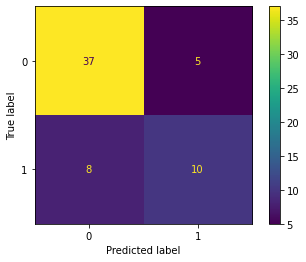

In [36]:
#LOGISTIC REGRESSION
lr=LogisticRegression(max_iter=3000) #creating logistic regressor
lr.fit(x_train,y_train)#training model 

#finding train score and test score
lr_train_score=round(lr.score(x_train,y_train),2)
lr_test_score=round(lr.score(x_test,y_test),2)

#model prediction on test data
y_pred_lr=lr.predict(x_test)

#accuracy score
lr_acc = round(accuracy_score(y_pred_lr,y_test),2)

#to print train score, test score, accuracy score
print("LogisticRegressionModel Train Score:",lr_train_score)
print("----------------------")
print("LogisticRegressionModel Test Score:",lr_test_score)
print("----------------------")
print("LogisticRegressionModel Accuracy Score:",lr_acc)
print("----------------------")

#getting testing accuracy,classification report and confusion matrix 

ts_acc_lr = round(accuracy_score(y_test,y_pred_lr),4)
print("Testing Accuracy:",round(ts_acc_lr*100,2),"%")
print("----------------------")
print("Classification report for xtest data:-\n",classification_report(y_test,y_pred_lr),"\n")
print("----------------------")
print("Cofusion matrix for xtest data:-\n\n",plot_confusion_matrix(lr,x_test,y_test))

DecisionTreeClassifier Train Score is :  0.9330543933054394
----------------------------------------------------------------
DecisionTreeClassifier Test Score is :  0.7666666666666667
----------------------------------------------------------------
DecisionTreeClassifier accuracy is :  0.7666666666666667
----------------------------------------------------------------
Testing Accuracy is:- 76.67 %
----------------------------------------------------------------
Classification report for xtest data:-

               precision    recall  f1-score   support

           0       0.83      0.83      0.83        42
           1       0.61      0.61      0.61        18

    accuracy                           0.77        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.77      0.77      0.77        60
 

----------------------------------------------------------------
Confusin Matrix for xtest data:-



C:\Users\sharm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



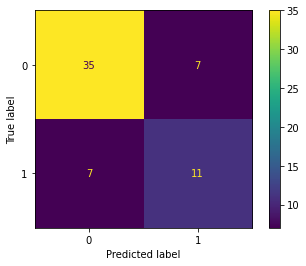

In [37]:
 #DecisionTreeClassifier
dt= DecisionTreeClassifier(max_features=5 , max_depth=5)
dt.fit(x_train, y_train)

dt_train_score = dt.score(x_train, y_train)
dt_test_score= dt.score(x_test, y_test)

y_pred_dt = dt.predict(x_test)
dt_acc = accuracy_score(y_pred_dt,y_test)


print('DecisionTreeClassifier Train Score is : ' , dt_train_score)
print("----------------------------------------------------------------")
print('DecisionTreeClassifier Test Score is : ' , dt_test_score)
print("----------------------------------------------------------------")
print('DecisionTreeClassifier accuracy is : ', dt_acc)

ts_acc_dt = round(accuracy_score(y_test,y_pred_dt),4)
print("----------------------------------------------------------------")
print("Testing Accuracy is:-",round(ts_acc_dt*100,2),"%")
print("----------------------------------------------------------------")
print("Classification report for xtest data:-\n\n",classification_report(y_test,y_pred_dt),"\n")
print("----------------------------------------------------------------")
print("Confusin Matrix for xtest data:-\n\n",plot_confusion_matrix(dt,x_test, y_test))

RandomForestClassifier Train Score is :  0.9456066945606695
----------------------------------------------------------------
RandomForestClassifier Test Score is :  0.7666666666666667
----------------------------------------------------------------
RandomForestClassifier accuracy is :  0.7666666666666667
----------------------------------------------------------------
Testing Accuracy is:- 76.67 %
----------------------------------------------------------------
Classification report for xtest data:-

               precision    recall  f1-score   support

           0       0.87      0.79      0.82        42
           1       0.59      0.72      0.65        18

    accuracy                           0.77        60
   macro avg       0.73      0.75      0.74        60
weighted avg       0.79      0.77      0.77        60
 

----------------------------------------------------------------
Confusin Matrix for xtest data:-



C:\Users\sharm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



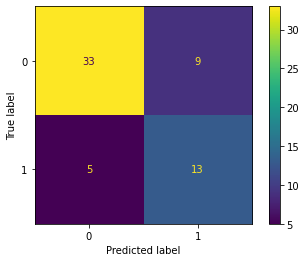

In [38]:
#RandomForestClassifier
rf= RandomForestClassifier(max_features=5 , max_depth=5)
rf.fit(x_train, y_train)

rf_train_score = rf.score(x_train, y_train)
rf_test_score= rf.score(x_test, y_test)

y_pred_rf = rf.predict(x_test)
rf_acc = accuracy_score(y_pred_rf,y_test)


print('RandomForestClassifier Train Score is : ' , rf_train_score)
print("----------------------------------------------------------------")

print('RandomForestClassifier Test Score is : ' , rf_test_score)
print("----------------------------------------------------------------")
print('RandomForestClassifier accuracy is : ', rf_acc)

ts_acc_rf = round(accuracy_score(y_test,y_pred_rf),4)
print("----------------------------------------------------------------")
print("Testing Accuracy is:-",round(ts_acc_rf*100,2),"%")
print("----------------------------------------------------------------")
print("Classification report for xtest data:-\n\n",classification_report(y_test,y_pred_rf),"\n")
print("----------------------------------------------------------------")
print("Confusin Matrix for xtest data:-\n\n",plot_confusion_matrix(rf,x_test, y_test))

In [39]:
#Model Evaluation
models = ['LinearRegression','LogisticRegression'  , 'DecisionTree','RandomForest']
model_data = [ln_acc,lr_acc, dt_acc, rf_acc ]
cols = ["accuracy_score"]
compare=pd.DataFrame(data=model_data , index= models , columns= cols)
compare.sort_values(ascending= False , by = ['accuracy_score'])

,accuracy_score
LogisticRegression,0.780000
LinearRegression,0.770000
DecisionTree,0.766667
RandomForest,0.766667


In [40]:
fig=px.bar(compare, x=models, y="accuracy_score")
fig.update_layout(
    template="plotly_dark")
fig